In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
from modAL.models import ActiveLearner

In [28]:
def GP_regression_std(regressor, X):
    _, std = regressor.predict(X, return_std=True)
    query_idx = np.argmax(std)
    return query_idx, X[query_idx]

X = np.random.choice(np.linspace(0,20,10000), size=200, replace=False).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.3, size=X.shape)

In [49]:
n_initial = 5
initial_idx = np.random.choice(range(len(X)), size=n_initial, replace=False)
X_init, y_init = X[initial_idx], y[initial_idx]

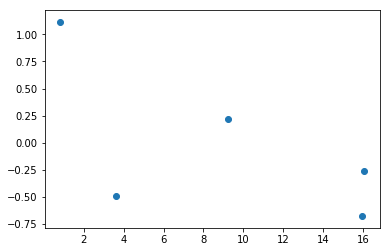

In [50]:
plt.scatter(X_init,y_init)

In [59]:
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2,1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10,1e+1))

In [60]:
kernel

RBF(length_scale=1) + WhiteKernel(noise_level=1)

In [61]:
regressor = ActiveLearner(estimator=GaussianProcessRegressor(kernel=kernel),
                         query_strategy = GP_regression_std,
                         X_training=X_init.reshape(-1,1), y_training=y_init)

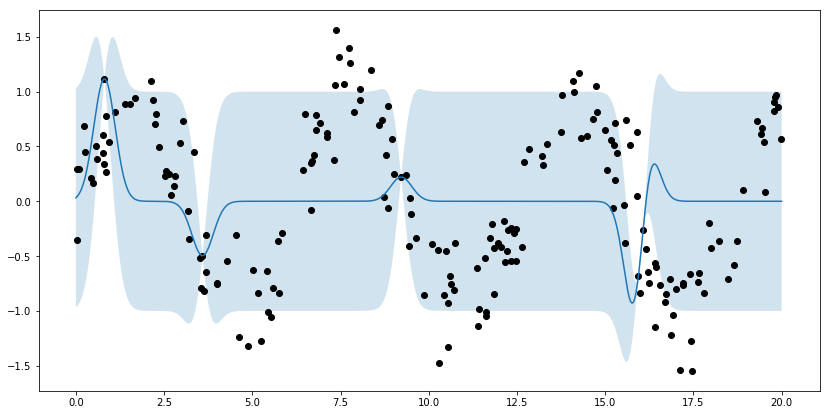

In [62]:
plt.style.context('seaborn-white')
plt.figure(figsize=(14,7))
x = np.linspace(0, 20, 1000)
pred, std = regressor.predict(x.reshape(-1,1), return_std=True)
plt.plot(x, pred)
plt.fill_between(x, pred.reshape(-1,)-std, pred.reshape(-1,)+std, alpha=0.2)
plt.scatter(X, y, c='k')

In [63]:
n_queries = 5
for idx in range(10):
    q_idx, q_instance = regressor.query(X)
    regressor.teach(X[q_idx].reshape(1,-1), y[q_idx].reshape(1,-1))

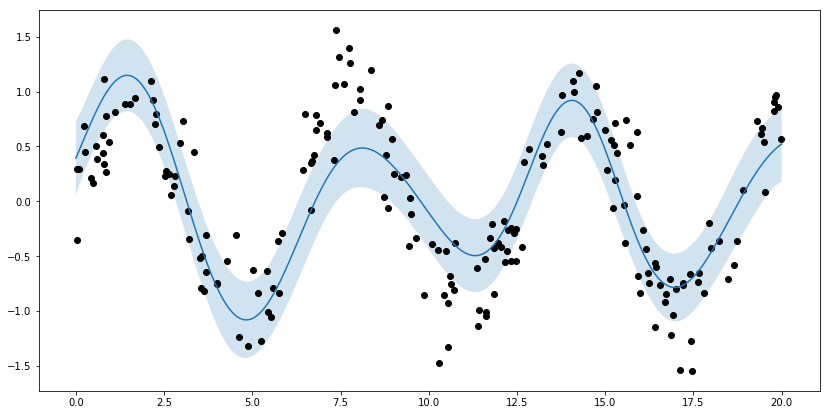

In [64]:
plt.style.context('seaborn-white')
plt.figure(figsize=(14,7))
x = np.linspace(0, 20, 1000)
pred, std = regressor.predict(x.reshape(-1,1), return_std=True)
plt.plot(x, pred)
plt.fill_between(x, pred.reshape(-1,)-std, pred.reshape(-1,)+std, alpha=0.2)
plt.scatter(X, y, c='k')